# Support Vector Machines with Letter Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
letter = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Mousami Datascience class\Excel files\letters.csv')
letter.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# EDA for letter

letter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
letter['lettr'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: lettr, dtype: int64

In [5]:
letter.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [6]:
letter.columns

Index(['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy',
       'y-ege', 'yegvx'],
      dtype='object')

In [7]:
order = list(np.sort(letter['lettr'].unique()))
order

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

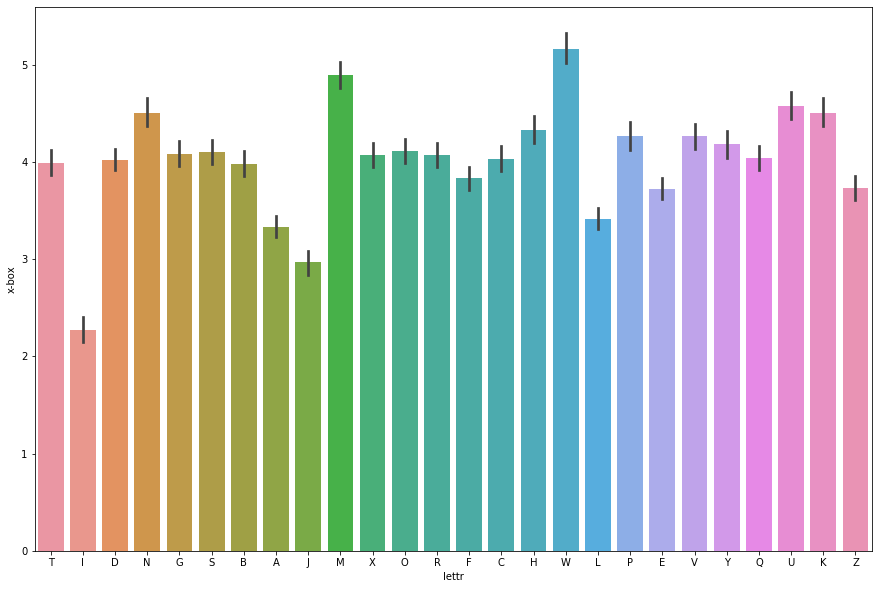

In [8]:
plt.figure(figsize=(15,10))
sns.barplot(x='lettr',y= 'x-box',data=letter)

In [9]:
lt_mean = letter.groupby('lettr').mean()
lt_mean

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
lettr,,,,,,,,,,,,,,,,
A,3.337136,6.975919,5.128010,5.178707,2.991128,8.851711,3.631179,2.755387,2.043093,7.802281,2.338403,8.465146,2.771863,6.321926,2.875792,7.468948
B,3.985640,6.962141,5.088773,5.169713,4.596606,7.671018,7.062663,5.366841,5.571802,7.954308,5.506527,6.652742,3.117493,7.919060,6.612272,9.100522
C,4.031250,7.063859,4.701087,5.296196,2.775815,5.437500,7.627717,5.927989,7.177989,8.773098,7.494565,11.947011,1.991848,8.876359,4.080163,8.555707
D,4.023602,7.244720,5.170186,5.288199,4.026087,7.539130,6.806211,5.921739,6.508075,8.166460,5.111801,5.750311,3.365217,7.813665,3.971429,7.628571
E,3.727865,6.944010,4.756510,5.201823,3.679688,5.966146,7.352865,4.223958,7.585938,8.507812,6.242188,10.341146,2.127604,8.298177,6.022135,8.506510
F,3.832258,7.009032,4.898065,5.209032,3.178065,4.913548,10.454194,3.476129,4.886452,11.242581,7.830968,5.723871,1.736774,9.117419,3.321290,6.712258
G,4.086675,6.988357,4.988357,5.282018,3.566624,6.866753,6.586028,5.966365,5.337646,7.429495,6.157827,9.586028,2.833118,8.369987,5.146184,9.216041
H,4.331063,6.844687,5.784741,5.193460,4.253406,7.344687,7.320163,6.702997,4.280654,8.044959,5.899183,7.801090,3.862398,8.047684,3.095368,7.858311
I,2.270199,6.980132,2.631788,5.209272,1.825166,7.458278,7.035762,1.940397,5.973510,9.476821,5.797351,7.649007,0.537748,8.066225,2.141722,7.931126


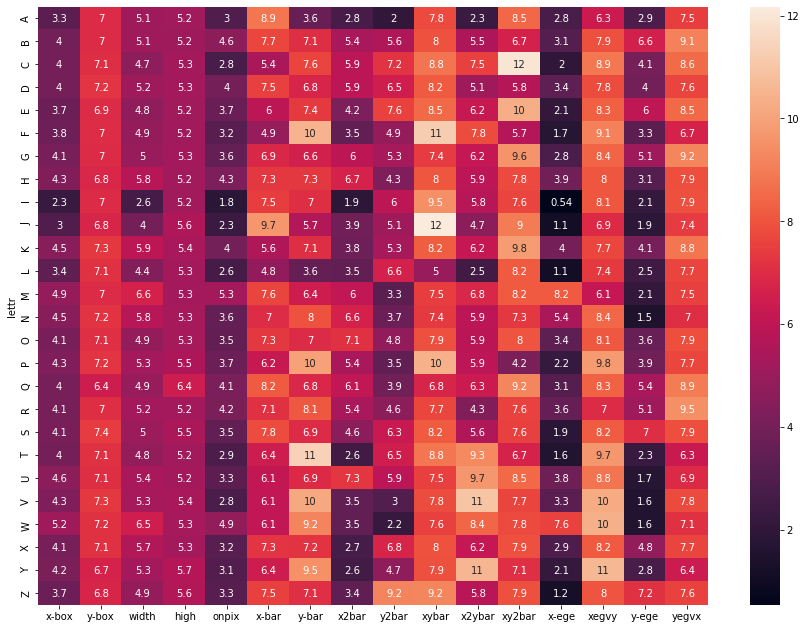

In [10]:
plt.figure(figsize=(15,11))
sns.heatmap(lt_mean,annot=True)

In [11]:
from sklearn.svm import SVC

In [12]:
X1 = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y1 = np.array([1, 1, 2, 2])
clf = SVC(gamma='auto')
clf.fit(X1, y1)
clf.predict([[-3,2]])

array([1])

In [14]:
X = letter.iloc[:,1:]
X.head()

Y = letter.iloc[:,0]
Y.head()

0    T
1    I
2    D
3    N
4    G
Name: lettr, dtype: object

In [37]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
clf.predict([[2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8]])

array(['T'], dtype=object)

In [39]:
clf.predict([[11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8]])

array(['M'], dtype=object)

In [63]:
clf.predict([[0,5,1,9,7,1,2,6,2,1,1,6,8,1,1,3]])

array(['M'], dtype=object)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [42]:
X_train.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
16152,0,0,0,0,0,7,7,4,4,7,6,8,0,8,0,8
17768,10,14,9,8,5,6,6,5,5,6,8,9,7,7,4,10
19492,6,7,9,5,5,9,6,3,7,10,5,8,3,8,3,8
15797,3,4,4,3,2,7,7,3,9,6,6,9,2,8,6,8
6666,5,9,8,6,5,9,8,4,1,6,9,8,7,11,0,8


In [43]:
y_train.head()

16152    I
17768    U
19492    H
15797    X
6666     W
Name: lettr, dtype: object

In [44]:
X_test.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
19134,3,3,4,2,1,4,11,2,7,11,10,5,1,11,2,5
4981,3,5,6,4,4,9,6,3,6,10,5,7,2,8,5,9
16643,4,8,4,5,2,3,8,8,2,7,5,11,4,8,3,10
19117,5,10,7,7,4,4,10,2,8,11,12,9,3,9,2,6
5306,4,7,4,8,5,8,7,6,4,8,7,9,3,8,6,8


In [45]:
y_test.head()

19134    Y
4981     B
16643    K
19117    Y
5306     Q
Name: lettr, dtype: object

In [46]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  oth

In [47]:
model = SVC(kernel='linear',gamma='auto')

In [48]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
X_pred = model.predict(X_test) 
X_pred

array(['Y', 'B', 'K', ..., 'V', 'U', 'M'], dtype=object)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [51]:
conf_mat = confusion_matrix(y_test,X_pred)


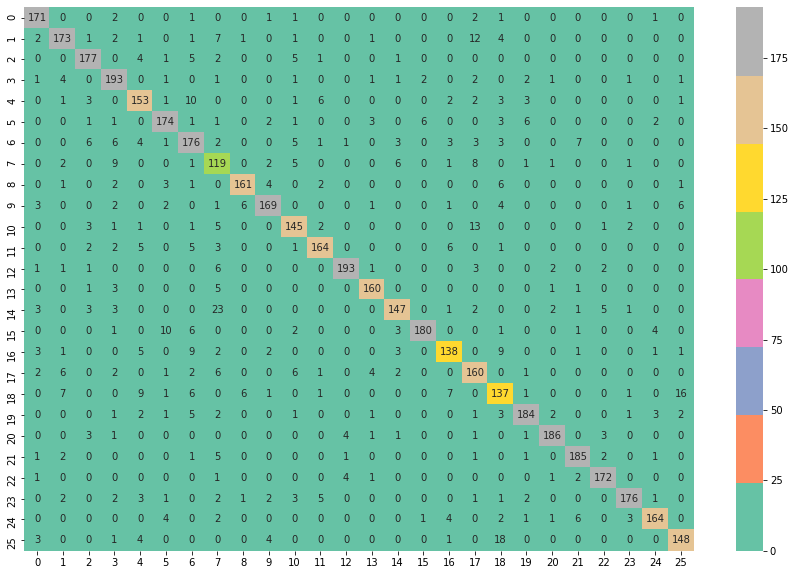

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(conf_mat,annot=True,fmt='.3g',cmap='Set2')

In [53]:
acc = accuracy_score(y_test,X_pred)*100
print('Accuracy:',acc,'%')

Accuracy: 86.1 %


In [55]:
# Types of kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}, default=’rbf’

In [56]:
model = SVC(kernel='poly')
model.fit(X_train,y_train)
X_pred = model.predict(X_test) 
conf_mat = confusion_matrix(y_test,X_pred)
acc = accuracy_score(y_test,X_pred)*100
print('Accuracy:',acc,'%')

Accuracy: 94.96 %


In [57]:
model = SVC(kernel='rbf',gamma='auto')
model.fit(X_train,y_train)
X_pred = model.predict(X_test) 
conf_mat = confusion_matrix(y_test,X_pred)
acc = accuracy_score(y_test,X_pred)*100
print('Accuracy:',acc,'%')

Accuracy: 97.66 %


In [58]:
model = SVC(kernel='sigmoid',gamma='auto')
model.fit(X_train,y_train)
X_pred = model.predict(X_test) 
conf_mat = confusion_matrix(y_test,X_pred)
acc = accuracy_score(y_test,X_pred)*100
print('Accuracy:',acc,'%')

Accuracy: 4.02 %
